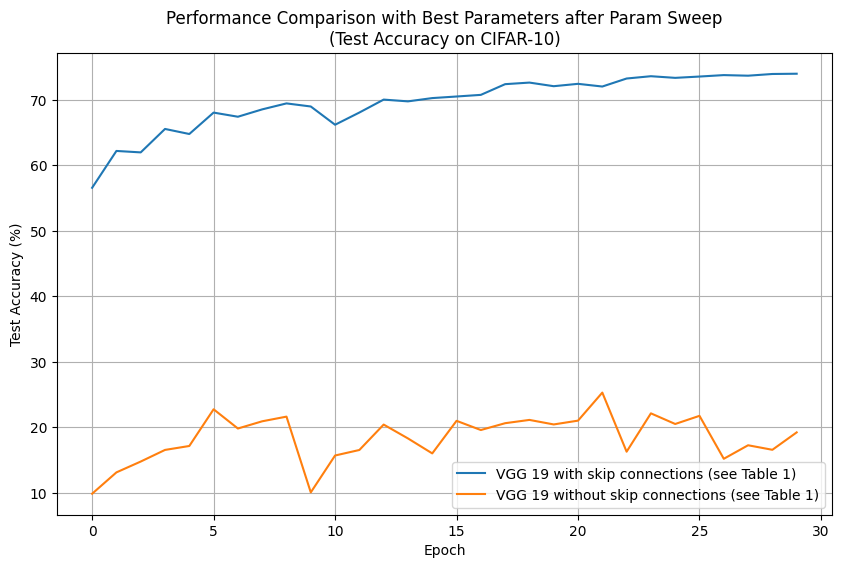

In [12]:
import json
import matplotlib.pyplot as plt

# Load JSON data
with open('./skip_connections/results_data/result_skip.json', 'r') as f:
    data_skip = json.load(f)

with open('./skip_connections/results_data/result_noskip.json', 'r') as f:
    data_noskip = json.load(f)

# Extract and scale results to percentage
results_skip = [x * 100 for x in data_skip['results']]
results_noskip = [x * 100 for x in data_noskip['results']]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(results_skip, label='VGG 19 with skip connections (see Table 1)')
plt.plot(results_noskip, label='VGG 19 without skip connections (see Table 1)')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (%)')
plt.title('Performance Comparison with Best Parameters after Param Sweep\n(Test Accuracy on CIFAR-10)')
plt.legend()
plt.grid(True)
plt.savefig('./skip_connections/results_data/skip_vs_noskip.pdf')
plt.show()


import json
import numpy as np
import matplotlib.pyplot as plt

# Load JSON data for skip connections
def load_json(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)[0]['results']

data_skip_0 = load_json('./skip_connections/results_seeds/vgg_skip_final4_0.json')
data_skip_1 = load_json('./skip_connections/results_seeds/vgg_skip_final4_1.json')
data_skip_2 = load_json('./skip_connections/results_seeds/vgg_skip_final4_2.json')

# Load JSON data for no skip connections
data_noskip_0 = load_json('./skip_connections/results_seeds/vgg_noskip_final4_0.json')
data_noskip_1 = load_json('./skip_connections/results_seeds/vgg_noskip_final4_1.json')
data_noskip_2 = load_json('./skip_connections/results_seeds/vgg_noskip_final4_2.json')

# Convert results to numpy arrays and scale to percentage
results_skip = np.array([data_skip_0, data_skip_1, data_skip_2]) * 100
results_noskip = np.array([data_noskip_0, data_noskip_1, data_noskip_2]) * 100

# Calculate means and standard deviations
mean_skip = np.mean(results_skip, axis=0)
std_skip = np.std(results_skip, axis=0)
mean_noskip = np.mean(results_noskip, axis=0)
std_noskip = np.std(results_noskip, axis=0)

# Plot results with shaded areas
plt.figure(figsize=(10, 6))
plt.plot(mean_skip, label='VGG 19 with skip connections (Mean)')
plt.fill_between(range(len(mean_skip)), mean_skip - std_skip, mean_skip + std_skip, alpha=0.3)
plt.plot(mean_noskip, label='VGG 19 without skip connections (Mean)')
plt.fill_between(range(len(mean_noskip)), mean_noskip - std_noskip, mean_noskip + std_noskip, alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (%)')
plt.title('Performance Comparison with Best Parameters after Param Sweep\n(Test Accuracy on CIFAR-10)')
plt.legend()
plt.grid(True)
plt.savefig('./skip_connections/results_seeds/skip_vs_noskip.pdf')
plt.show()


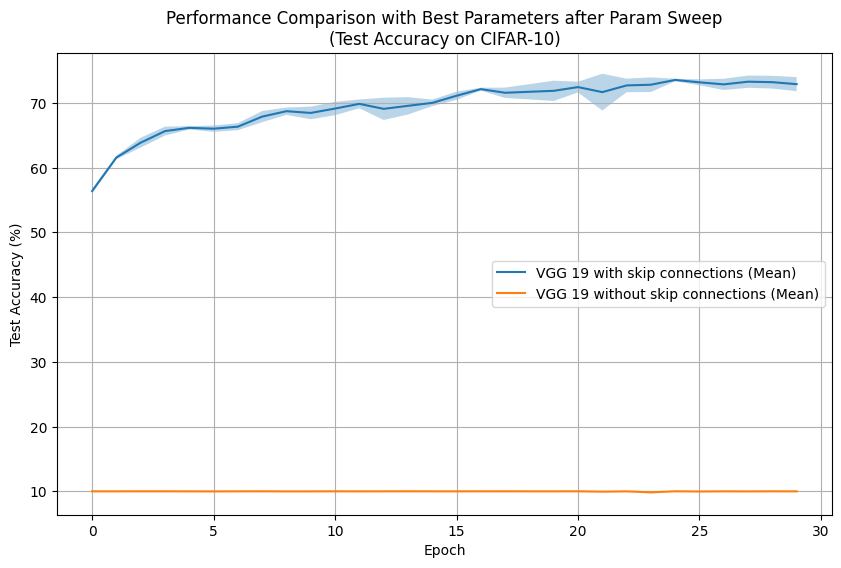

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load JSON data for skip connections
def load_json(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)[0]['results']

data_skip_0 = load_json('./skip_connections/results_seeds/vgg_skip_final4_0.json')
data_skip_1 = load_json('./skip_connections/results_seeds/vgg_skip_final4_1.json')
data_skip_2 = load_json('./skip_connections/results_seeds/vgg_skip_final4_2.json')

# Load JSON data for no skip connections
data_noskip_0 = load_json('./skip_connections/results_seeds/vgg_noskip_final4_0.json')
data_noskip_1 = load_json('./skip_connections/results_seeds/vgg_noskip_final4_1.json')
data_noskip_2 = load_json('./skip_connections/results_seeds/vgg_noskip_final4_2.json')

# Function to pad lists to the same length
def pad_list(lst, length):
    return lst + [lst[-1]] * (length - len(lst))

# Determine the maximum length
max_length = max(len(data_skip_0), len(data_skip_1), len(data_skip_2), len(data_noskip_0), len(data_noskip_1), len(data_noskip_2))

# Pad all lists to the maximum length
data_skip_0 = pad_list(data_skip_0, max_length)
data_skip_1 = pad_list(data_skip_1, max_length)
data_skip_2 = pad_list(data_skip_2, max_length)
data_noskip_0 = pad_list(data_noskip_0, max_length)
data_noskip_1 = pad_list(data_noskip_1, max_length)
data_noskip_2 = pad_list(data_noskip_2, max_length)

# Convert results to numpy arrays and scale to percentage
results_skip = np.array([data_skip_0, data_skip_1, data_skip_2]) * 100
results_noskip = np.array([data_noskip_0, data_noskip_1, data_noskip_2]) * 100

# Calculate means and standard deviations
mean_skip = np.mean(results_skip, axis=0)
std_skip = np.std(results_skip, axis=0)
mean_noskip = np.mean(results_noskip, axis=0)
std_noskip = np.std(results_noskip, axis=0)

# Plot results with shaded areas
plt.figure(figsize=(10, 6))
plt.plot(mean_skip, label='VGG 19 with skip connections (Mean)')
plt.fill_between(range(len(mean_skip)), mean_skip - std_skip, mean_skip + std_skip, alpha=0.3)
plt.plot(mean_noskip, label='VGG 19 without skip connections (Mean)')
plt.fill_between(range(len(mean_noskip)), mean_noskip - std_noskip, mean_noskip + std_noskip, alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (%)')
plt.title('Performance Comparison with and without skip connections \n(Test Accuracy on CIFAR-10)')
plt.legend()
plt.grid(True)
plt.savefig('./skip_connections/results_seeds/skip_vs_noskip.pdf')
plt.show()
